# Classificação de Minerais #

**Business Understanding**

In [1]:
# importar os pacotes necessários
import os
import re
import cv2#TIRAR
import shutil
import numpy as np
import pandas as pd
import seaborn as sn #TIRAR
from random import randint
import plotly.express as px
from keras import backend as K
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from keras.models import Sequential
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense,Conv2D,Flatten,MaxPool2D,Dropout

In [ ]:
!wget https://github.com/LarissaDG/api/raw/main/Emulate.zip

--2022-02-08 14:02:32--  https://github.com/LarissaDG/api/raw/main/Emulate.zip
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/LarissaDG/api/main/Emulate.zip [following]
--2022-02-08 14:02:32--  https://raw.githubusercontent.com/LarissaDG/api/main/Emulate.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6607349 (6.3M) [application/zip]
Saving to: ‘Emulate.zip’

Emulate.zip         100%[===================>]   6.30M  --.-KB/s    in 0.09s   

2022-02-08 14:02:33 (69.3 MB/s) - ‘Emulate.zip’ saved [6607349/6607349]



In [ ]:
!unzip /content/Emulate.zip

Archive:  /content/Emulate.zip
   creating: Emulate/Andalusite/
  inflating: Emulate/Andalusite/andalusitemagmatica(10).jpg  
  inflating: Emulate/Andalusite/andalusitemagmatica(11).jpg  
  inflating: Emulate/Andalusite/andalusitemagmatica(12).jpg  
  inflating: Emulate/Andalusite/andalusitemagmatica(13).jpg  
  inflating: Emulate/Andalusite/andalusitemagmatica(2).jpg  
  inflating: Emulate/Andalusite/andalusitemagmatica(3).jpg  
  inflating: Emulate/Andalusite/andalusitemagmatica(4).jpg  
  inflating: Emulate/Andalusite/andalusitemagmatica(5).jpg  
  inflating: Emulate/Andalusite/andalusitemagmatica(6).jpg  
  inflating: Emulate/Andalusite/andalusitemagmatica(7).jpg  
  inflating: Emulate/Andalusite/andalusitemagmatica(8).jpg  
  inflating: Emulate/Andalusite/andalusitemagmatica(9).jpg  
  inflating: Emulate/Andalusite/calamita(1).jpg  
  inflating: Emulate/Andalusite/calamita(17).jpg  
  inflating: Emulate/Andalusite/calamita(18).jpg  
  inflating: Emulate/Andalusite/calamita(19).jpg

In [3]:
!wget https://github.com/LarissaDG/api/raw/main/Dataset.zip

--2022-02-13 04:11:30--  https://github.com/LarissaDG/api/raw/main/Dataset.zip
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/LarissaDG/api/main/Dataset.zip [following]
--2022-02-13 04:11:30--  https://raw.githubusercontent.com/LarissaDG/api/main/Dataset.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 56044500 (53M) [application/zip]
Saving to: ‘Dataset.zip’

Dataset.zip         100%[===================>]  53.45M   206MB/s    in 0.3s    

2022-02-13 04:11:31 (206 MB/s) - ‘Dataset.zip’ saved [56044500/56044500]



In [4]:
!unzip /content/Dataset.zip

Archive:  /content/Dataset.zip
   creating: Dataset/Andalusite/
  inflating: Dataset/Andalusite/andalusitemagmatica(10).jpg  
  inflating: Dataset/Andalusite/andalusitemagmatica(11).jpg  
  inflating: Dataset/Andalusite/andalusitemagmatica(12).jpg  
  inflating: Dataset/Andalusite/andalusitemagmatica(13).jpg  
  inflating: Dataset/Andalusite/andalusitemagmatica(2).jpg  
  inflating: Dataset/Andalusite/andalusitemagmatica(3).jpg  
  inflating: Dataset/Andalusite/andalusitemagmatica(4).jpg  
  inflating: Dataset/Andalusite/andalusitemagmatica(5).jpg  
  inflating: Dataset/Andalusite/andalusitemagmatica(6).jpg  
  inflating: Dataset/Andalusite/andalusitemagmatica(7).jpg  
  inflating: Dataset/Andalusite/andalusitemagmatica(8).jpg  
  inflating: Dataset/Andalusite/andalusitemagmatica(9).jpg  
  inflating: Dataset/Andalusite/calamita(1).jpg  
  inflating: Dataset/Andalusite/calamita(17).jpg  
  inflating: Dataset/Andalusite/calamita(18).jpg  
  inflating: Dataset/Andalusite/calamita(19).jpg

In [ ]:
#Emulate variables
IMAGE_PATH = r"/content/Emulate"
GENERAL_PATH = r"/content"
OUTPUT_PATH = r"./Output" #teste

IMAGE_WIDTH = 30 #Original 200
IMAGE_HEIGHT = 30 
val_ratio = 0.20
test_ratio = 0.20
np.random.seed(1)

In [5]:
#Global variables
IMAGE_PATH = r"/content/Dataset"
GENERAL_PATH = r"/content"
OUTPUT_PATH = r"./Output" #teste

IMAGE_WIDTH = 50 
IMAGE_HEIGHT = 50 
val_ratio = 0.20
test_ratio = 0.20
np.random.seed(1)

**Data Understanding**

In [6]:
classes, num_photos, imagens, image_label = [], [], [], [] 

for root, dirs, files in os.walk(IMAGE_PATH):
    f = os.path.basename(root) # pega o nome da classe
    classes.append(f)       
    for file in files:
        string = root+'/'+file
        path = r"{}".format(string)
        imagens.append(mpimg.imread(path))
        image_label.append(str(f))
    
    if len(files) > 0:
        num_photos.append(len(files))
    
        
#print(imagens)
del classes[0]
print('{} classes with {} images in total'.format(len(classes), sum(num_photos)))

16 classes with 415 images in total


In [ ]:
def remove_unwanted_classes(classes,num_photos,string,flag=0):
  aux_i = []
  aux = string.split(',')
  if flag == 0:
    for partes in aux:
      index = classes.index(partes)
      aux_i.append(index)
    num_photos = [i for j, i in enumerate(num_photos) if j in aux_i]
    classes = [i for j, i in enumerate(classes) if j in aux_i]
  if flag == 1:
    for partes in aux:
      index = classes.index(partes)
      aux_i.append(index)
      num_photos = [i for j, i in enumerate(num_photos) if j not in aux_i]
      classes = [i for j, i in enumerate(classes) if j not in aux_i]
  return num_photos,classes

In [ ]:
num_photos, classes = remove_unwanted_classes(classes,num_photos,'Muscovite',1)
print(num_photos)
print(classes)

[19, 10, 36, 27, 12, 31, 42, 30, 38, 20, 36, 46, 30, 13, 18]
['Biotite', 'Gold', 'Cancrinite', 'Andalusite', 'Quartz', 'Fluorite', 'Tourmaline', 'Garnets', 'Olivine', 'Sodalite', 'Topaz', 'Lazulite', 'Beryl', 'Calcite', 'Titanite (sphene)']


In [ ]:
len(imagens)

415

Olivine


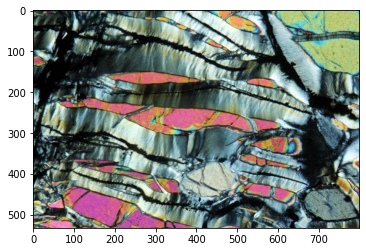

In [7]:
imgplot = plt.imshow(imagens[18])
print(image_label[18])

In [8]:
#Plota o gráfico de barras: classes e quantidade de dados por classe
data = {"Classes":classes,"NumFotos":num_photos}
df = pd.DataFrame(data)
df = df.sort_values("NumFotos",ascending=False)
print(df)

              Classes  NumFotos
15           Lazulite        46
6          Tourmaline        42
1             Olivine        38
5          Cancrinite        36
10              Topaz        36
9            Fluorite        31
2             Garnets        30
13              Beryl        30
12         Andalusite        27
8            Sodalite        20
7             Biotite        19
0   Titanite (sphene)        18
4             Calcite        13
14             Quartz        12
11               Gold        10
3           Muscovite         7


In [9]:
#Separar dados de treino e teste -> saravanansaminathan Kaggle -> https://www.kaggle.com/questions-and-answers/102677
root_dir = IMAGE_PATH + '/' # data root path
classes_dir = classes #total labels

for cls in classes_dir:
    os.makedirs(root_dir +'train/' + cls)
    os.makedirs(root_dir +'val/' + cls)
    os.makedirs(root_dir +'test/' + cls)


for cls in classes_dir:
    # Creating partitions of the data after shuffeling
    src = root_dir + cls # Folder to copy images from

    allFileNames = os.listdir(src)
    np.random.shuffle(allFileNames)
    train_FileNames, val_FileNames, test_FileNames = np.split(np.array(allFileNames),
                                                          [int(len(allFileNames)* (1 - (val_ratio + test_ratio))), 
                                                           int(len(allFileNames)* (1 - test_ratio))])


    train_FileNames = [src+'/'+ name for name in train_FileNames.tolist()]
    val_FileNames = [src+'/' + name for name in val_FileNames.tolist()]
    test_FileNames = [src+'/' + name for name in test_FileNames.tolist()]

    print('Total images: ', len(allFileNames))
    print('Training: ', len(train_FileNames))
    print('Validation: ', len(val_FileNames))
    print('Testing: ', len(test_FileNames))

    # Copy-pasting images

    for name in train_FileNames:
        #print("Classe destino", cls)
        shutil.copy(name, root_dir +'train/' + cls)

    for name in val_FileNames:
      shutil.copy(name, root_dir +'val/' + cls)

    for name in test_FileNames:
        #print("Classe destino_2", cls)
        shutil.copy(name, root_dir +'test/' + cls)

Total images:  18
Training:  10
Validation:  4
Testing:  4
Total images:  38
Training:  22
Validation:  8
Testing:  8
Total images:  30
Training:  18
Validation:  6
Testing:  6
Total images:  7
Training:  4
Validation:  1
Testing:  2
Total images:  13
Training:  7
Validation:  3
Testing:  3
Total images:  36
Training:  21
Validation:  7
Testing:  8
Total images:  42
Training:  25
Validation:  8
Testing:  9
Total images:  19
Training:  11
Validation:  4
Testing:  4
Total images:  20
Training:  12
Validation:  4
Testing:  4
Total images:  31
Training:  18
Validation:  6
Testing:  7
Total images:  36
Training:  21
Validation:  7
Testing:  8
Total images:  10
Training:  6
Validation:  2
Testing:  2
Total images:  27
Training:  16
Validation:  5
Testing:  6
Total images:  30
Training:  18
Validation:  6
Testing:  6
Total images:  12
Training:  7
Validation:  2
Testing:  3
Total images:  46
Training:  27
Validation:  9
Testing:  10


**Data preparation**

Data augmentation -> Somente nos dados de treino

In [10]:
root_dir = IMAGE_PATH + '/train/' # data root path
classes_dir = classes #total labels

#Para cada classe (subpasta)
for cls in classes_dir:
    #Pego o diretorio da pasta
    src = root_dir + cls # Folder to augment data
    
    #Listo todos os arquivos de uma classe
    allFileNames = os.listdir(src)
    
    #Para cada arquivo:
    for name in allFileNames:
        
        #Pego o diretorio da imagem
        path = src+'/'+ name
        
        # Carrego a imagem
        image = load_img(path)
        # converter em array
        image = img_to_array(image)
        # adicionar uma dimensão extra no array
        image = np.expand_dims(image, axis = 0)
        
        # create image data augmentation generator
        dataGen = ImageDataGenerator(rotation_range=45, 
                                     width_shift_range=0.1,
                                     height_shift_range=0.1, 
                                     zoom_range=0.25,
                                     fill_mode='nearest', 
                                     horizontal_flip=True)
        imgGen = dataGen.flow(image, save_to_dir=src,
                             save_format='jpg', save_prefix='t27_')
        # gerar 10 imagens por data augmentation
        counter = 0
        for (i, newImage) in enumerate(imgGen):
            counter += 1

            # ao gerar 10 imagens, parar o loop
            if counter == 10:
                break

**Modeling**

In [11]:
def normaliza_imagem(imagem):
    linhas = np.shape(imagem)[0]
    colunas = np.shape(imagem)[1]
    for lin in range(linhas):
      for col in range(colunas):
        imagem[lin][col] = imagem[lin][col] /255
    return imagem

In [12]:
# Processing training data

X_train = []       
y_train = []
shape = (IMAGE_WIDTH,IMAGE_HEIGHT)  
root_dir = IMAGE_PATH + '/train/'
classes_dir = classes

#Para cada classe (subpasta)
for cls in classes_dir:
    #Pego o diretorio da pasta
    src = root_dir + cls # Folder to augment data
    
    #Listo todos os arquivos de uma classe
    allFileNames = os.listdir(src)
    
    #Para cada arquivo:
    for name in allFileNames:
        #Pego o diretorio da imagem
        path = src+'/'+ name
        
        # Carrego a imagem (Original)
        #image = cv2.imread(path)
        #image = cv2.resize(image,dsize = shape)
        #X_train.append(image)
        
        
        image = load_img(path)
        image = image.resize(shape)
        image = img_to_array(image)
        X_train.append(image)
        
        
        #Le a label
        y_train.append(cls)
        
# Converting train_images to array
X_train = np.array(X_train)
        
#Convertendo labels to 1-hot-encoded
y_train = pd.get_dummies(y_train).values
 
# Splitting Training data into train and validation dataset
#X_train,X_val,y_train,y_val = train_test_split(X_train,y_train,random_state=1)

In [13]:
# Processing validation data

X_val = []       
y_val = []
shape = (IMAGE_WIDTH,IMAGE_HEIGHT)  
root_dir = IMAGE_PATH + '/val/'
classes_dir = classes

#Para cada classe (subpasta)
for cls in classes_dir:
    #Pego o diretorio da pasta
    src = root_dir + cls # Folder to augment data
    
    #Listo todos os arquivos de uma classe
    allFileNames = os.listdir(src)
    
    #Para cada arquivo:
    for name in allFileNames:
        #Pego o diretorio da imagem
        path = src+'/'+ name
        
        # Carrego a imagem (Original)
        #image = cv2.imread(path)
        #image = cv2.resize(image,dsize = shape)
        #X_train.append(image)
        
        
        image = load_img(path)
        image = image.resize(shape)
        image = img_to_array(image)
        X_val.append(image)
        
        
        #Le a label
        y_val.append(cls)
        
# Converting train_images to array
X_val = np.array(X_val)
        
#Convertendo labels to 1-hot-encoded
y_val = pd.get_dummies(y_val).values

[0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0]


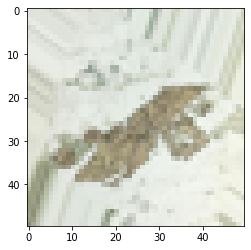

In [14]:
# Visualizing Training data
print(y_train[0])
plt.imshow(X_train[0].astype(int))

In [15]:
# Processing test data

X_test = []       
y_test = []
shape = (IMAGE_WIDTH,IMAGE_HEIGHT)  
root_dir = IMAGE_PATH + '/test/'

#Para cada classe (subpasta)
for cls in classes_dir:
    #Pego o diretorio da pasta
    src = root_dir + cls # Folder to augment data
    
    #Listo todos os arquivos de uma classe
    allFileNames = os.listdir(src)
    
    #Para cada arquivo:
    for name in allFileNames:
        #Pego o diretorio da imagem
        path = src+'/'+ name
        
        # Carrego a imagem
        image = load_img(path)
        image = image.resize(shape)
        image = img_to_array(image)
        X_test.append(image)
        
        
        #Le a label
        y_test.append(cls)
        

#Convertendo imagens para arrays
X_test = np.array(X_test)

Titanite (sphene)


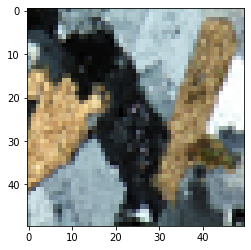

In [16]:
# Visualizing Testing data
print(y_test[0])
plt.imshow(X_test[0].astype(int))

In [17]:
# Creating a Sequential model
model= Sequential()
model.add(Conv2D(kernel_size=(3,3), filters=32, activation='tanh', input_shape=(shape[0],shape[1],3)))
model.add(Conv2D(filters=30,kernel_size = (3,3),activation='tanh'))
model.add(MaxPool2D(2,2))
model.add(Conv2D(filters=30,kernel_size = (3,3),activation='tanh'))
model.add(MaxPool2D(2,2))
model.add(Conv2D(filters=30,kernel_size = (3,3),activation='tanh'))

model.add(Flatten())

model.add(Dense(20,activation='relu'))
model.add(Dense(15,activation='relu'))
model.add(Dense(len(classes),activation = 'softmax'))
    
model.compile(
              loss='categorical_crossentropy', 
              metrics=['acc'],
              optimizer='adam'
             )
# Model Summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 46, 46, 30)        8670      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 23, 23, 30)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 21, 21, 30)        8130      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 10, 10, 30)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 8, 8, 30)          8

In [18]:
# Training the model
print("Learning rate before first fit:", model.optimizer.learning_rate.numpy())
history = model.fit(X_train,y_train,epochs=150,batch_size=50,validation_data=(X_val,y_val))

Learning rate before first fit: 0.001
Epoch 1/150
53/53 [==============================] - 11s 29ms/step - loss: 2.5977 - acc: 0.1385 - val_loss: 2.5945 - val_acc: 0.1463
Epoch 2/150
53/53 [==============================] - 1s 17ms/step - loss: 2.3313 - acc: 0.2276 - val_loss: 2.5073 - val_acc: 0.2683
Epoch 3/150
53/53 [==============================] - 1s 17ms/step - loss: 2.0280 - acc: 0.3356 - val_loss: 2.4251 - val_acc: 0.2683
Epoch 4/150
53/53 [==============================] - 1s 18ms/step - loss: 1.8735 - acc: 0.3666 - val_loss: 2.3969 - val_acc: 0.2927
Epoch 5/150
53/53 [==============================] - 1s 18ms/step - loss: 1.6368 - acc: 0.4311 - val_loss: 2.3804 - val_acc: 0.3537
Epoch 6/150
53/53 [==============================] - 1s 17ms/step - loss: 1.4008 - acc: 0.5266 - val_loss: 2.3452 - val_acc: 0.3293
Epoch 7/150
53/53 [==============================] - 1s 17ms/step - loss: 1.2517 - acc: 0.5844 - val_loss: 2.4410 - val_acc: 0.4024
Epoch 8/150
53/53 [==================

In [ ]:
#K.set_value(model.optimizer.learning_rate, 0.5)
#print("Learning rate before second fit:", model.optimizer.learning_rate.numpy())
#history = model.fit(X_train,y_train,epochs=200,batch_size=50,validation_data=(X_val,y_val))

**Evaluation**

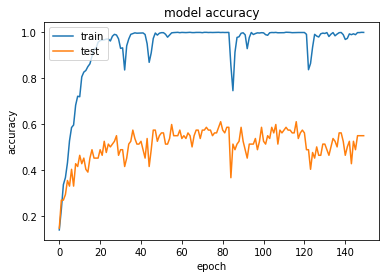

In [19]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

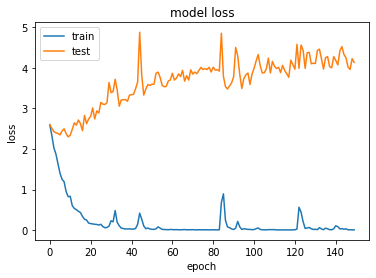

In [20]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [21]:
# Evaluating model on validation data
evaluate = model.evaluate(X_val,y_val)
print(evaluate)

3/3 [==============================] - 0s 38ms/step - loss: 4.1324 - acc: 0.5488
[4.132410049438477, 0.5487805008888245]


Actual :-  ['Titanite (sphene)']
Predicted :-  Cancrinite


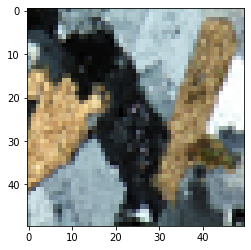

In [22]:
# Testing predictions and the actual label
checkImage = X_test[0:1]
checklabel = y_test[0:1]

predict = model.predict(np.array(checkImage))

output = { 0:'Andalusite',1:'Beryl',2:'Biotite',3:'Calcite',4:'Cancrinite',5:'Fluorite',6:'Garnets',7:'Gold',8:'Lazulite',9:'Muscovite',10:'Olivine',11:'Quartz',12:'Sodalite',13:'Titanite (sphene)',14:'Topaz',15:'Tourmaline'}
#output = { 0:'Andalusite',1:'Calcite',2:'Gold',3:'Lazulite'}

print("Actual :- ",checklabel)
print("Predicted :- ",output[np.argmax(predict)])

plt.imshow(X_test[0].astype(int))

Predicted :-  Cancrinite
Actual :-  Titanite (sphene)


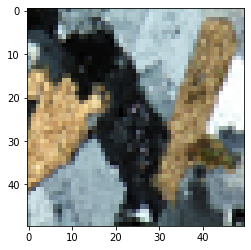

Predicted :-  Olivine
Actual :-  Titanite (sphene)


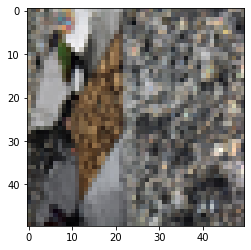

Predicted :-  Titanite (sphene)
Actual :-  Titanite (sphene)


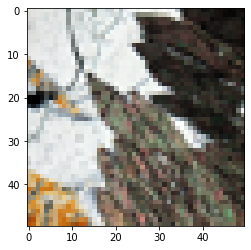

Predicted :-  Calcite
Actual :-  Titanite (sphene)


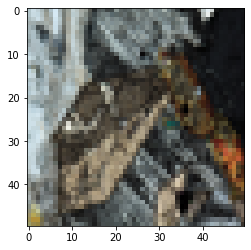

Predicted :-  Biotite
Actual :-  Olivine


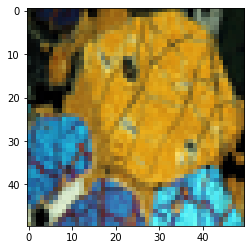

Predicted :-  Beryl
Actual :-  Olivine


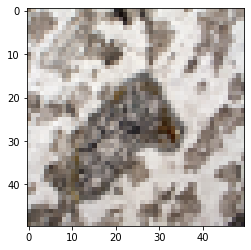

Predicted :-  Lazulite
Actual :-  Olivine


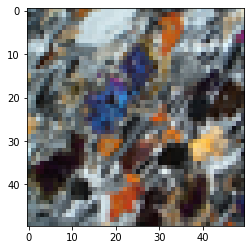

Predicted :-  Lazulite
Actual :-  Olivine


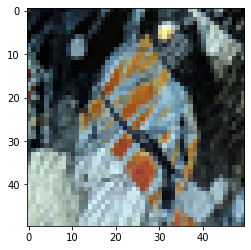

Predicted :-  Olivine
Actual :-  Olivine


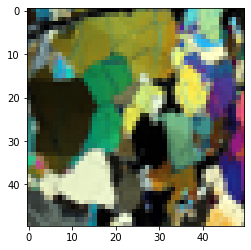

Predicted :-  Calcite
Actual :-  Olivine


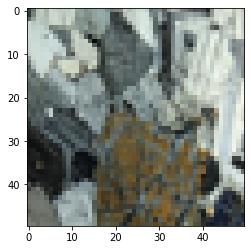

Predicted :-  Olivine
Actual :-  Olivine


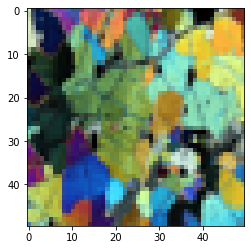

Predicted :-  Olivine
Actual :-  Olivine


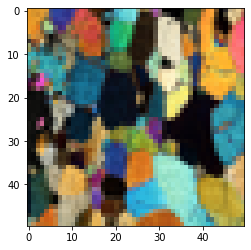

Predicted :-  Topaz
Actual :-  Garnets


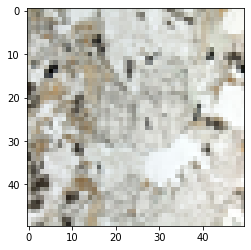

Predicted :-  Garnets
Actual :-  Garnets


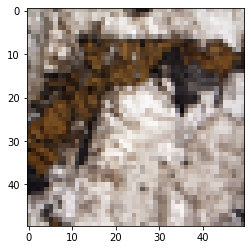

Predicted :-  Andalusite
Actual :-  Garnets


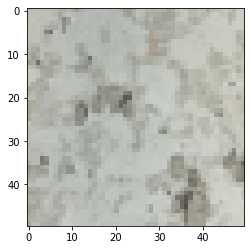

Predicted :-  Andalusite
Actual :-  Garnets


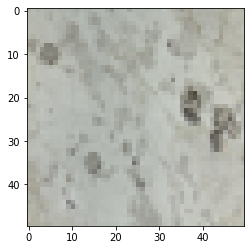

Predicted :-  Garnets
Actual :-  Garnets


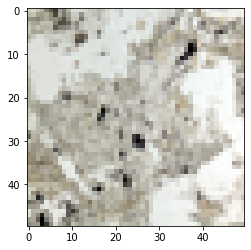

Predicted :-  Tourmaline
Actual :-  Garnets


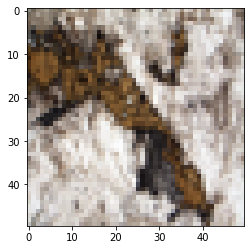

Predicted :-  Cancrinite
Actual :-  Muscovite


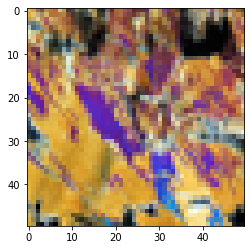

Predicted :-  Calcite
Actual :-  Muscovite


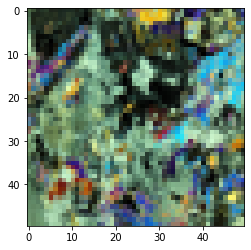

Predicted :-  Calcite
Actual :-  Calcite


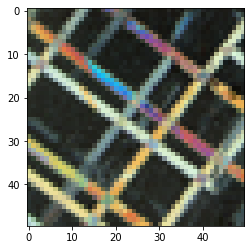

Predicted :-  Topaz
Actual :-  Calcite


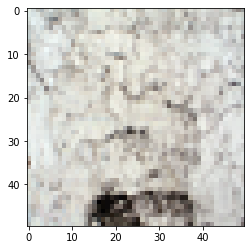

Predicted :-  Lazulite
Actual :-  Calcite


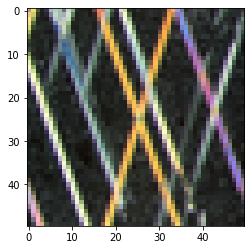

Predicted :-  Cancrinite
Actual :-  Cancrinite


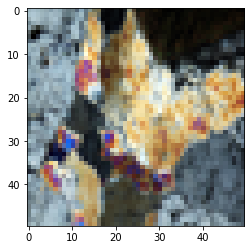

Predicted :-  Calcite
Actual :-  Cancrinite


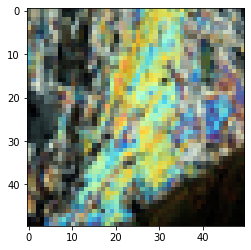

Predicted :-  Cancrinite
Actual :-  Cancrinite


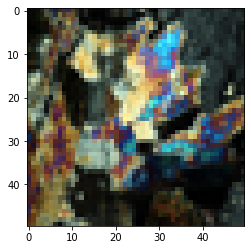

Predicted :-  Cancrinite
Actual :-  Cancrinite


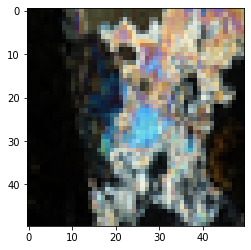

Predicted :-  Olivine
Actual :-  Cancrinite


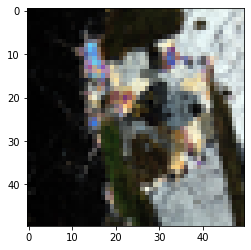

Predicted :-  Topaz
Actual :-  Cancrinite


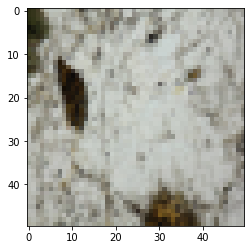

Predicted :-  Calcite
Actual :-  Cancrinite


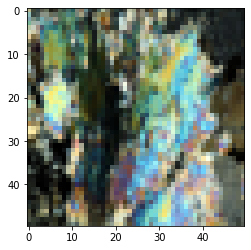

Predicted :-  Cancrinite
Actual :-  Cancrinite


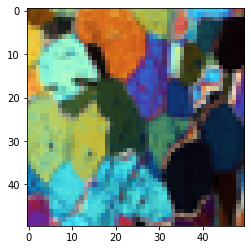

Predicted :-  Tourmaline
Actual :-  Tourmaline


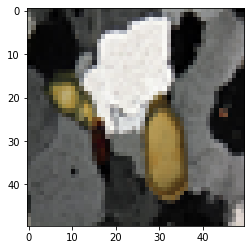

Predicted :-  Topaz
Actual :-  Tourmaline


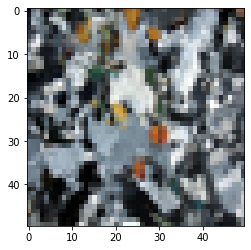

Predicted :-  Olivine
Actual :-  Tourmaline


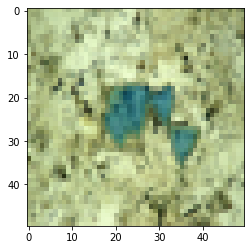

Predicted :-  Tourmaline
Actual :-  Tourmaline


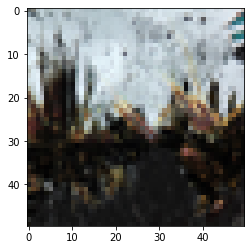

Predicted :-  Titanite (sphene)
Actual :-  Tourmaline


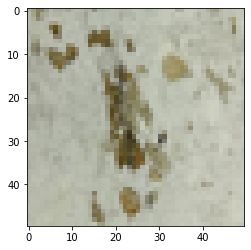

Predicted :-  Olivine
Actual :-  Tourmaline


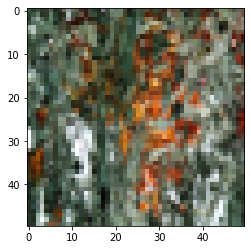

Predicted :-  Tourmaline
Actual :-  Tourmaline


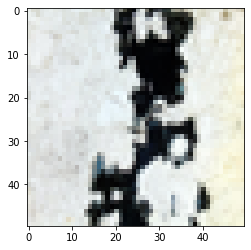

Predicted :-  Sodalite
Actual :-  Tourmaline


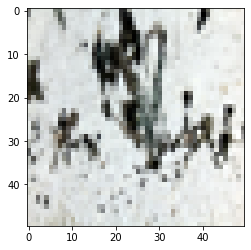

Predicted :-  Biotite
Actual :-  Tourmaline


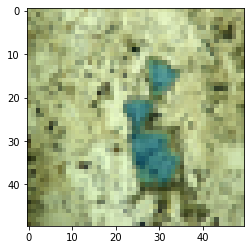

Predicted :-  Quartz
Actual :-  Biotite


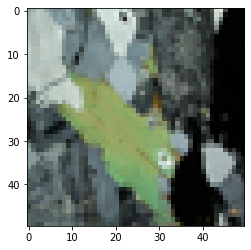

Predicted :-  Biotite
Actual :-  Biotite


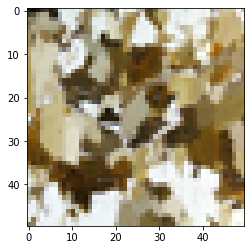

Predicted :-  Cancrinite
Actual :-  Biotite


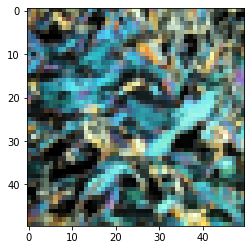

Predicted :-  Beryl
Actual :-  Biotite


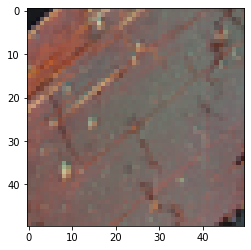

Predicted :-  Sodalite
Actual :-  Sodalite


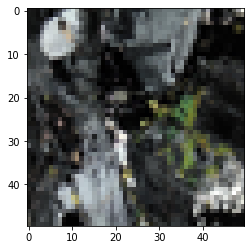

Predicted :-  Andalusite
Actual :-  Sodalite


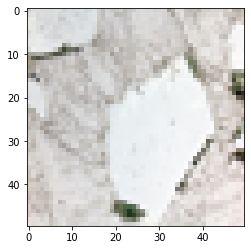

Predicted :-  Cancrinite
Actual :-  Sodalite


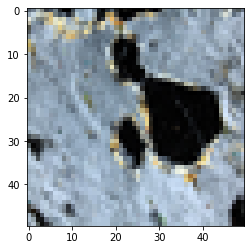

Predicted :-  Cancrinite
Actual :-  Sodalite


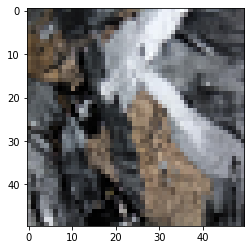

Predicted :-  Fluorite
Actual :-  Fluorite


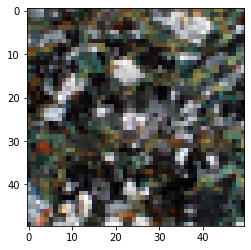

Predicted :-  Fluorite
Actual :-  Fluorite


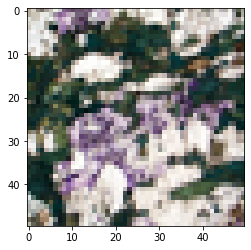

Predicted :-  Fluorite
Actual :-  Fluorite


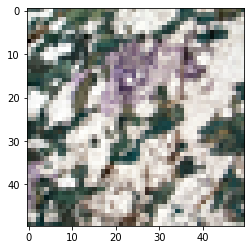

Predicted :-  Fluorite
Actual :-  Fluorite


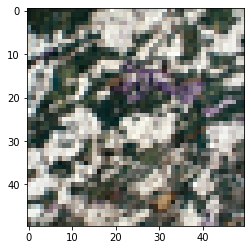

Predicted :-  Calcite
Actual :-  Fluorite


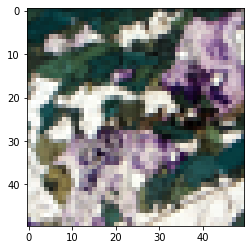

Predicted :-  Fluorite
Actual :-  Fluorite


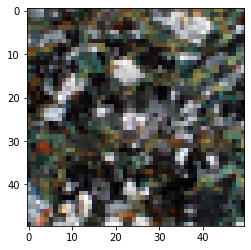

Predicted :-  Fluorite
Actual :-  Fluorite


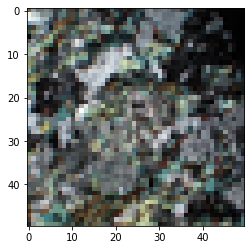

Predicted :-  Topaz
Actual :-  Topaz


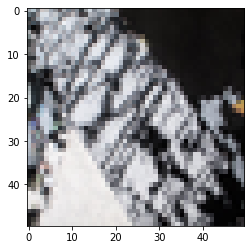

Predicted :-  Topaz
Actual :-  Topaz


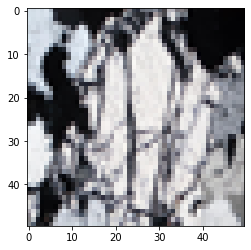

Predicted :-  Topaz
Actual :-  Topaz


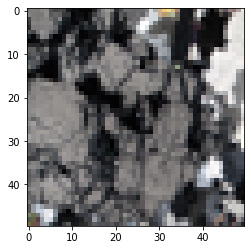

Predicted :-  Topaz
Actual :-  Topaz


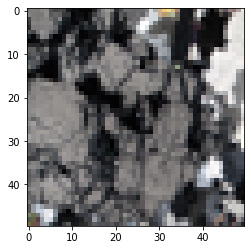

Predicted :-  Topaz
Actual :-  Topaz


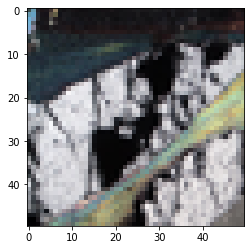

Predicted :-  Topaz
Actual :-  Topaz


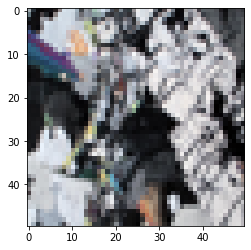

Predicted :-  Topaz
Actual :-  Topaz


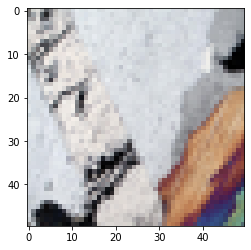

Predicted :-  Topaz
Actual :-  Topaz


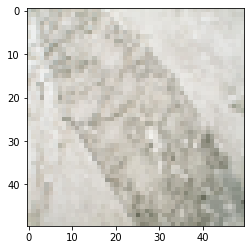

Predicted :-  Gold
Actual :-  Gold


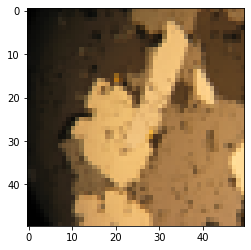

Predicted :-  Gold
Actual :-  Gold


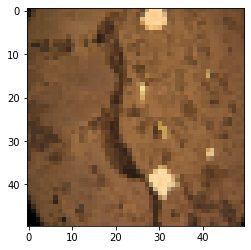

Predicted :-  Andalusite
Actual :-  Andalusite


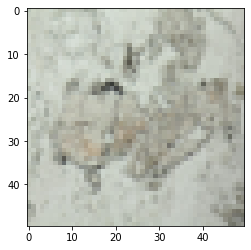

Predicted :-  Andalusite
Actual :-  Andalusite


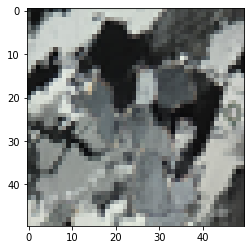

Predicted :-  Quartz
Actual :-  Andalusite


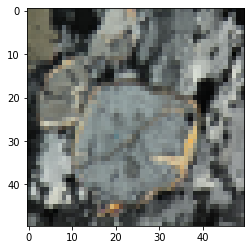

Predicted :-  Andalusite
Actual :-  Andalusite


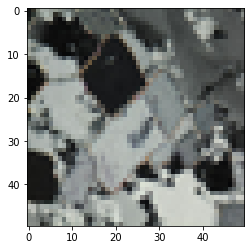

Predicted :-  Quartz
Actual :-  Andalusite


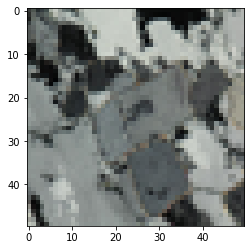

Predicted :-  Andalusite
Actual :-  Andalusite


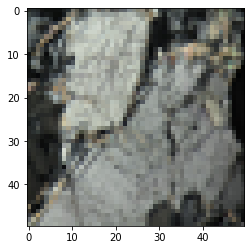

Predicted :-  Beryl
Actual :-  Beryl


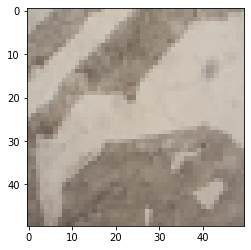

Predicted :-  Garnets
Actual :-  Beryl


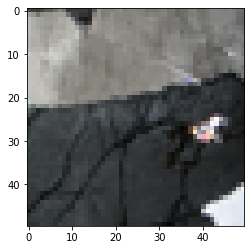

Predicted :-  Calcite
Actual :-  Beryl


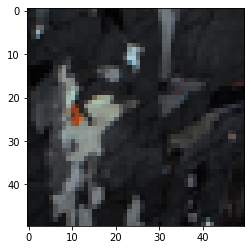

Predicted :-  Beryl
Actual :-  Beryl


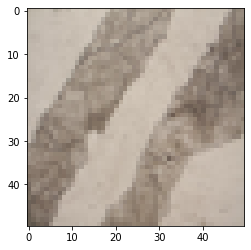

Predicted :-  Beryl
Actual :-  Beryl


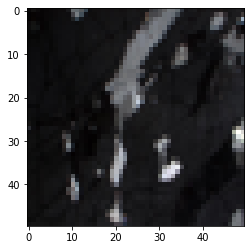

Predicted :-  Beryl
Actual :-  Beryl


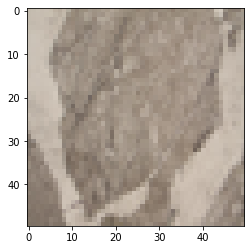

Predicted :-  Andalusite
Actual :-  Quartz


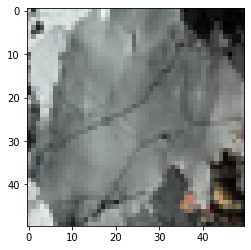

Predicted :-  Beryl
Actual :-  Quartz


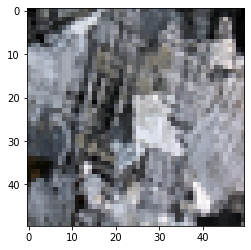

Predicted :-  Quartz
Actual :-  Quartz


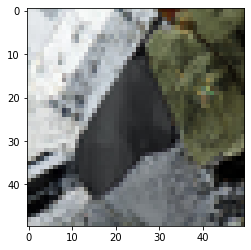

Predicted :-  Lazulite
Actual :-  Lazulite


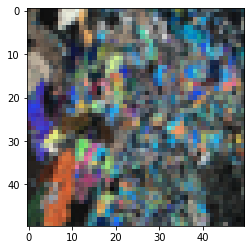

Predicted :-  Lazulite
Actual :-  Lazulite


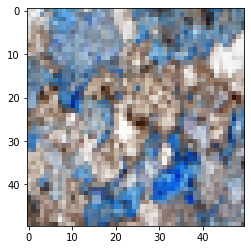

Predicted :-  Lazulite
Actual :-  Lazulite


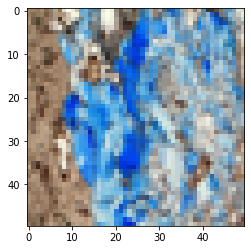

Predicted :-  Lazulite
Actual :-  Lazulite


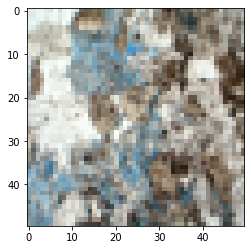

Predicted :-  Lazulite
Actual :-  Lazulite


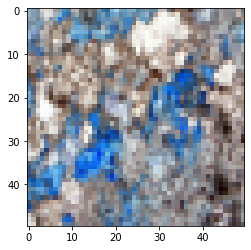

Predicted :-  Titanite (sphene)
Actual :-  Lazulite


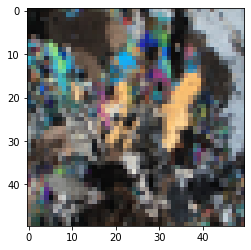

Predicted :-  Lazulite
Actual :-  Lazulite


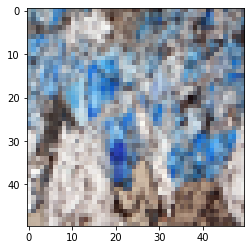

Predicted :-  Muscovite
Actual :-  Lazulite


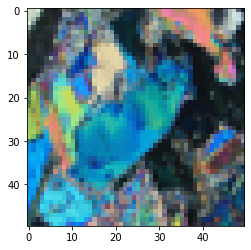

Predicted :-  Lazulite
Actual :-  Lazulite


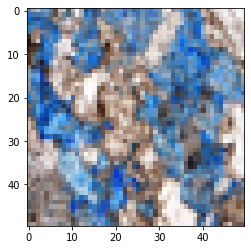

Predicted :-  Fluorite
Actual :-  Lazulite


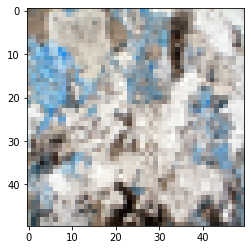

In [23]:
# Testing predictions and the actual label
checkImage = X_test
checklabel = y_test
a = 0
num_acertos = 0

output = { 0:'Andalusite',1:'Beryl',2:'Biotite',3:'Calcite',4:'Cancrinite',5:'Fluorite',6:'Garnets',7:'Gold',8:'Lazulite',9:'Muscovite',10:'Olivine',11:'Quartz',12:'Sodalite',13:'Titanite (sphene)',14:'Topaz',15:'Tourmaline'}
#output = { 0:'Andalusite',1:'Calcite',2:'Gold',3:'Lazulite'}
for i in checkImage : 
  predict = model.predict(np.expand_dims(i, axis=0))
  plt.imshow(i.astype(int))
  print("Predicted :- ",output[np.argmax(predict)])
  print("Actual :- ",checklabel[a])
  if output[np.argmax(predict)] == checklabel[a]:
    num_acertos += 1 
  plt.show(block=True)
  a += 1 
  #print(a)

  #plt.imshow(i.astype(int))

In [24]:
print("acc:", num_acertos/len(X_test))

acc: 0.5333333333333333
